In [16]:
import pandas as pd
data=pd.read_csv("C:\\Users\\svdk\\Downloads\\heart_attack_prediction_dataset.csv")
data.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233          286.0                                0   
1  27.194973          235.0                                1   
2  28.176571          587.0                                4   
3  36.464704          378.0                                3   
4  21.809144          231.0                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                  6.0  Argentina  South America  Southern Hemisphere   
1                  7.0     Canada  North America  Northern Hemisphere   
2                  4.0     France         Europe  Northern Hemisphere   
3                  4.0     Canada  North America  Northern Hemisphere   
4                  5.0   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Display the first few rows of the dataset
print("Initial Data Preview:")
print(data.head())

# Task 1: Data Cleaning

data.drop(data.columns[0], axis=1, inplace=True)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Initial Data Preview:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Ac

In [18]:
# Handling missing values by romving those particular rows
# since there were only 3 rows with null values, they are handled by removing them
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


# Check for duplicates and remove them
print("\nNumber of duplicate entries:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Missing values in each column:
 Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Number of duplicate entries: 

Axes(0.125,0.11;0.775x0.77)


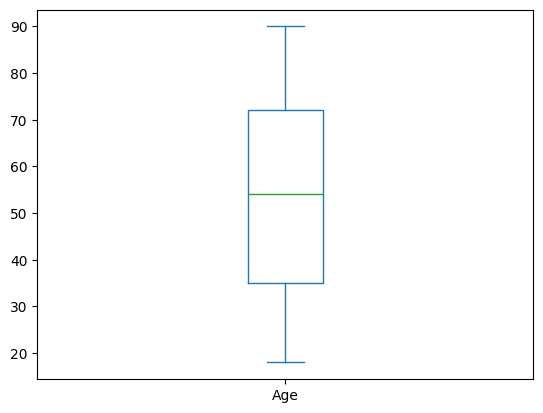

In [19]:
print(data['Age'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


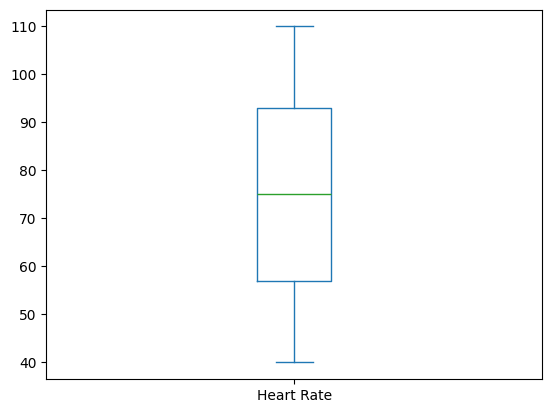

In [20]:
print(data['Heart Rate'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


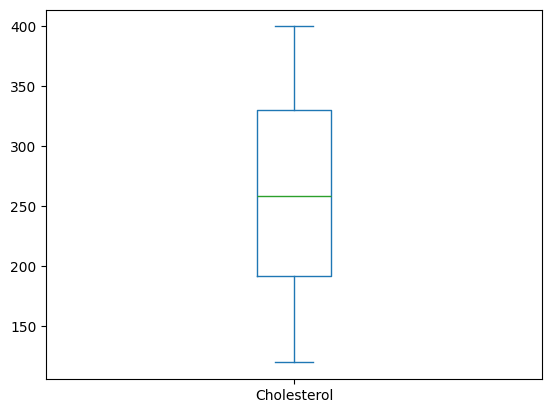

In [21]:
print(data['Cholesterol'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


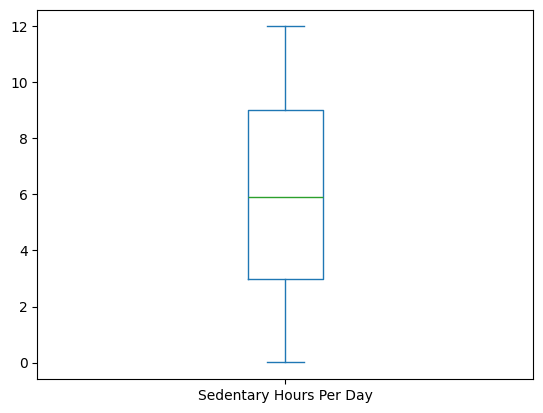

In [22]:
print(data['Sedentary Hours Per Day'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


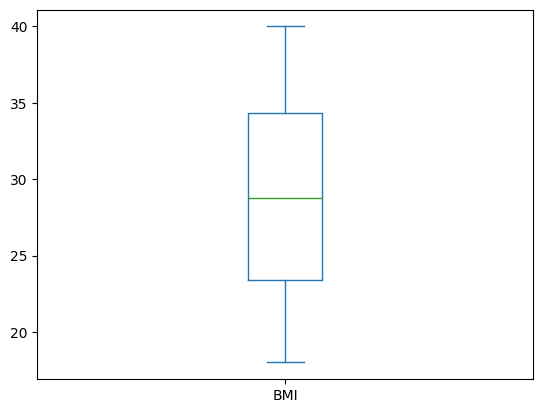

In [23]:
print(data['BMI'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


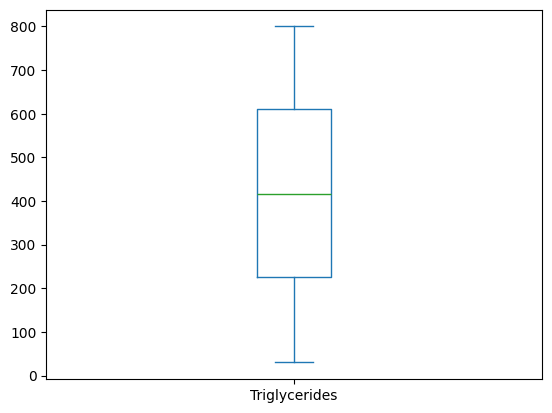

In [24]:
print(data['Triglycerides'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


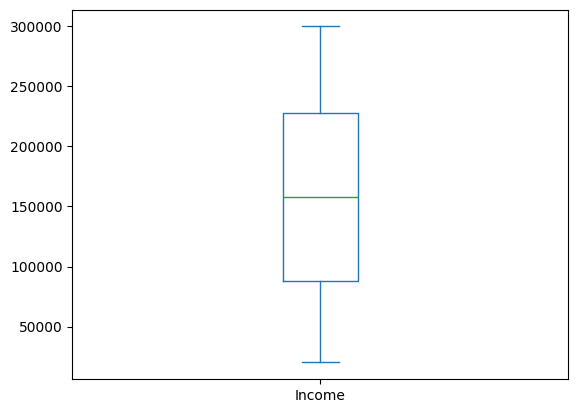

In [25]:
print(data['Income'].plot(kind='box'))

Axes(0.125,0.11;0.775x0.77)


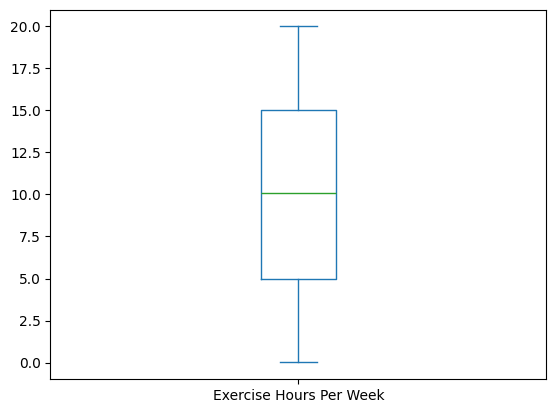

In [26]:
print(data['Exercise Hours Per Week'].plot(kind='box'))

In [27]:

import pandas as pd

data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric types
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

data = data.drop(columns=['Blood Pressure'])

num_features=["Systolic","Diastolic","Age","Cholesterol","Heart Rate","Exercise Hours Per Week", "Sedentary Hours Per Day", "Income","BMI","Triglycerides"]

# Task 2: Data Transformation
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.head()

Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0  0.625634    Male    -0.641307   -0.146630         0               0   
1 -1.539187    Male     1.597418    1.118527         1               1   
2 -1.539187  Female     0.793456   -0.146630         1               0   
3  1.425676    Male     1.523206   -0.097970         1               1   
4  0.578573    Male     0.719244    0.875228         1               1   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        1        0                    0                -1.011055  ...   
1        1        1                    1                -1.418312  ...   
2        0        0                    0                -1.372465  ...   
3        1        0                    1                -0.032243  ...   
4        1        1                    0                -0.728111  ...   

        BMI  Triglycerides  Physical Activity Days Per Week  \
0  0.373642      -0.588729                                0   
1 -0.268363      -0.816691                                1   
2 -0.113000       0.756693                                4   
3  1.198805      -0.177504                                3   
4 -1.120805      -0.834571                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                  6.0  Argentina  South America  Southern Hemisphere   
1                  7.0     Canada  North America  Northern Hemisphere   
2                  4.0     France         Europe  Northern Hemisphere   
3                  4.0     Canada  North America  Northern Hemisphere   
4                  5.0   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  Systolic  Diastolic  
0                  0  0.869950   0.193597  
1                  0  1.135628   0.534254  
2                  0  1.477215   0.943042  
3                  0  1.059720   1.011173  
4                  0 -1.672975   0.193597  

[5 rows x 26 columns]

In [ ]:

from sklearn import preprocessing 



categorical_features=["Sex","Country","Hemisphere","Diet","Continent"]
for col in categorical_features:
    data[col] = preprocessing.LabelEncoder().fit_transform(data[col])
data.head()

Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0  0.625634    1    -0.641307   -0.146630         0               0        1   
1 -1.539187    1     1.597418    1.118527         1               1        1   
2 -1.539187    0     0.793456   -0.146630         1               0        0   
3  1.425676    1     1.523206   -0.097970         1               1        1   
4  0.578573    1     0.719244    0.875228         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...       BMI  \
0        0                    0                -1.011055  ...  0.373642   
1        1                    1                -1.418312  ... -0.268363   
2        0                    0                -1.372465  ... -0.113000   
3        0                    1                -0.032243  ...  1.198805   
4        1                    0                -0.728111  ... -1.120805   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0      -0.588729                                0                  6.0   
1      -0.816691                                1                  7.0   
2       0.756693                                4                  4.0   
3      -0.177504                                3                  4.0   
4      -0.834571                                1                  5.0   

   Country  Continent  Hemisphere  Heart Attack Risk  Systolic  Diastolic  
0        0          5           1                  0  0.869950   0.193597  
1        3          4           0                  0  1.135628   0.534254  
2        6          3           0                  0  1.477215   0.943042  
3        3          4           0                  0  1.059720   1.011173  
4       16          1           0                  0 -1.672975   0.193597  

[5 rows x 26 columns]

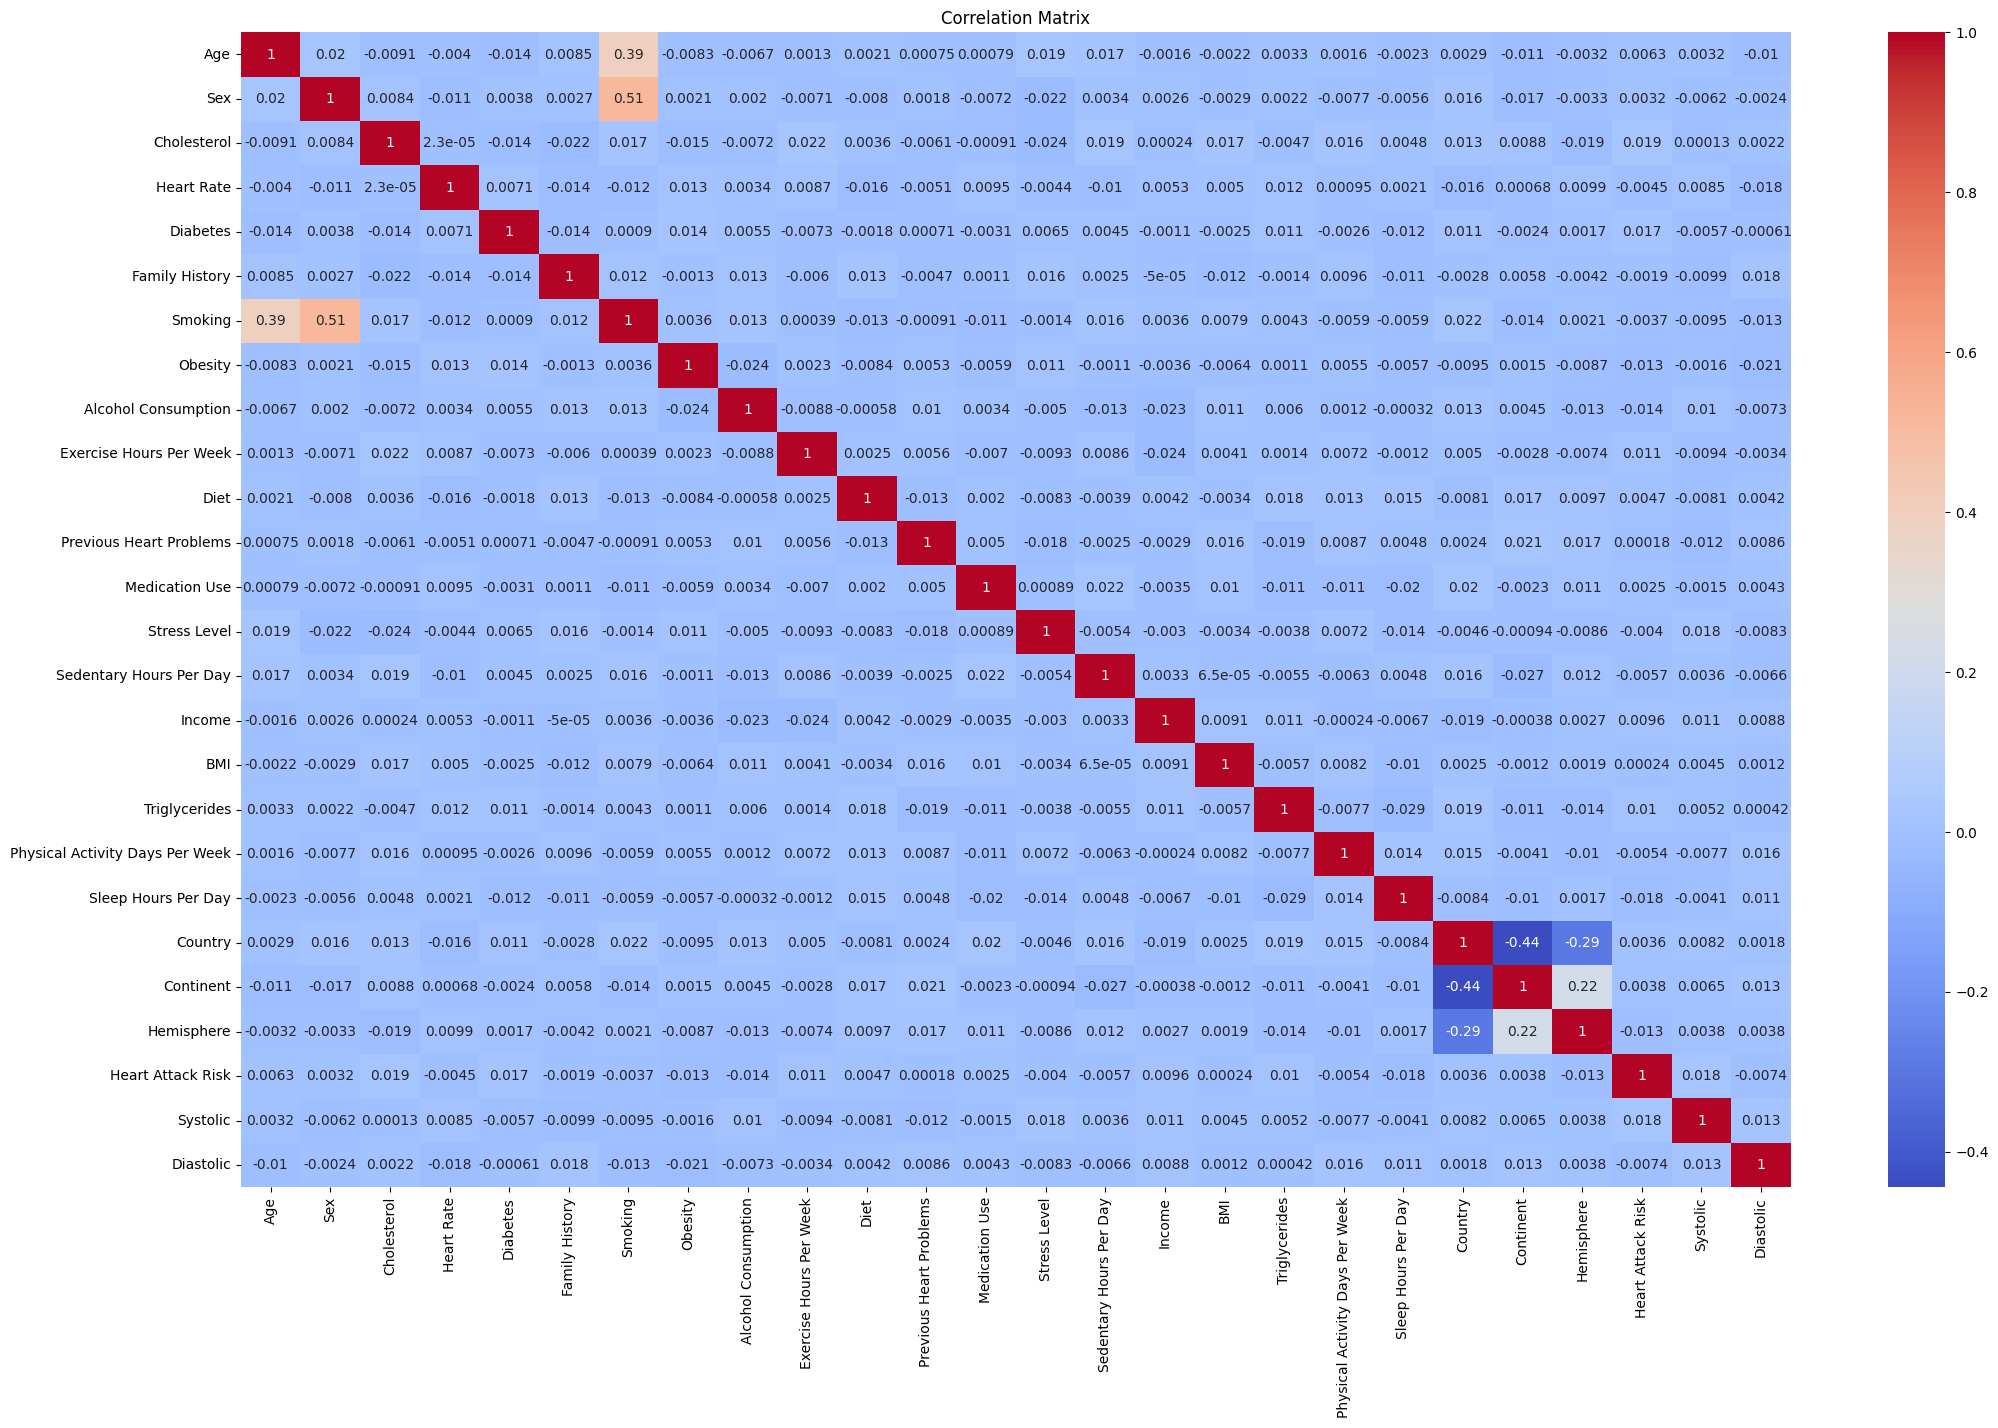

In [29]:
# Task 4: Feature Engineering
import seaborn as sns

# Analyzing the importance of the new features with correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Univariate Analysis:


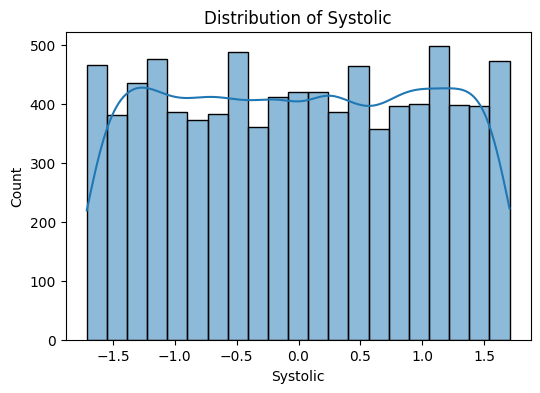

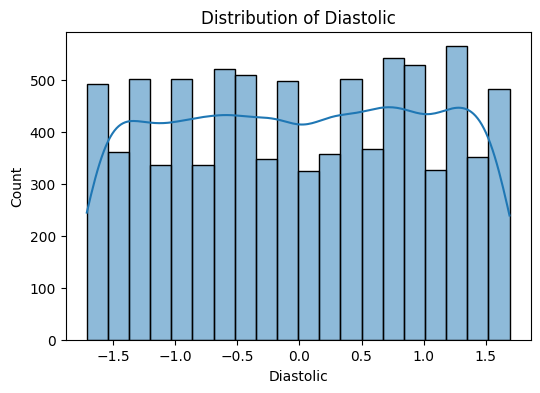

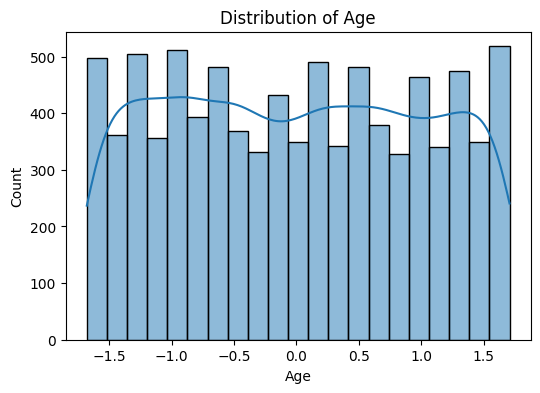

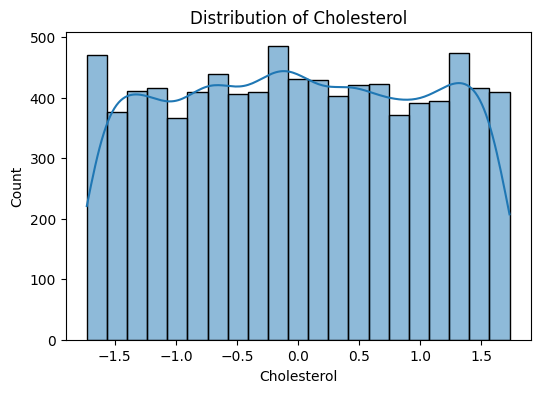

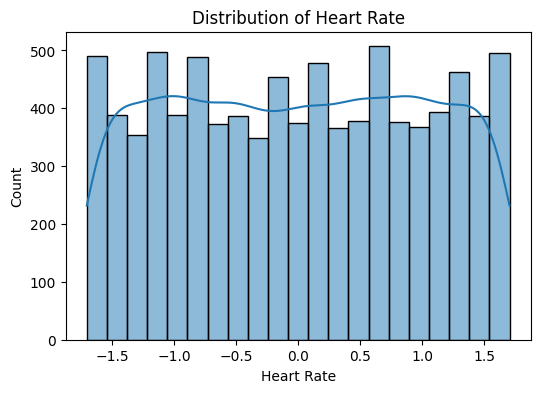

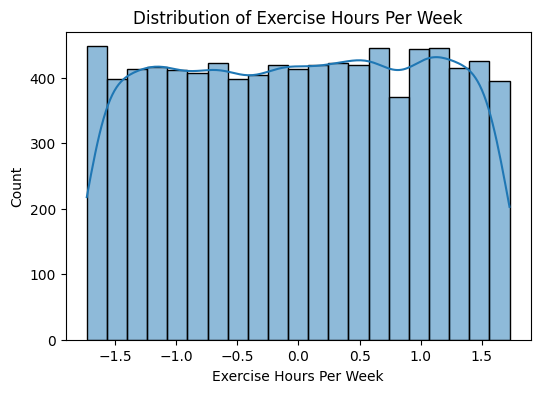

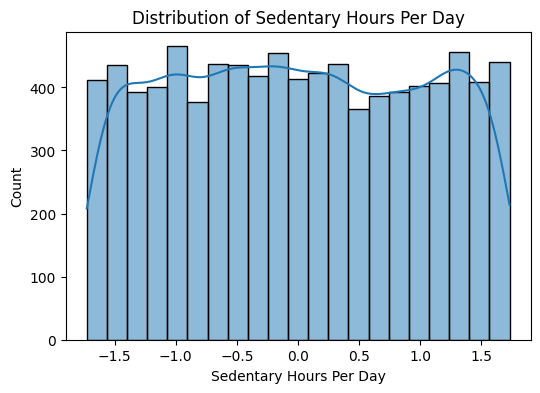

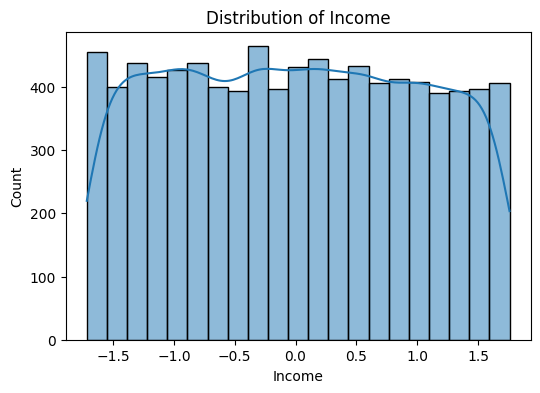

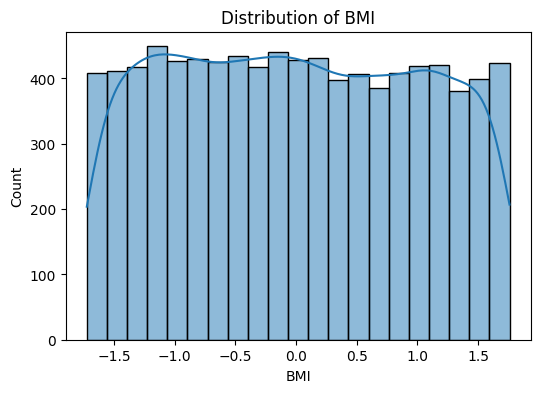

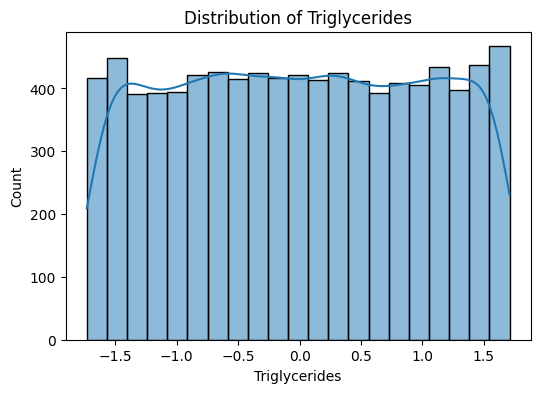


Bivariate Analysis:


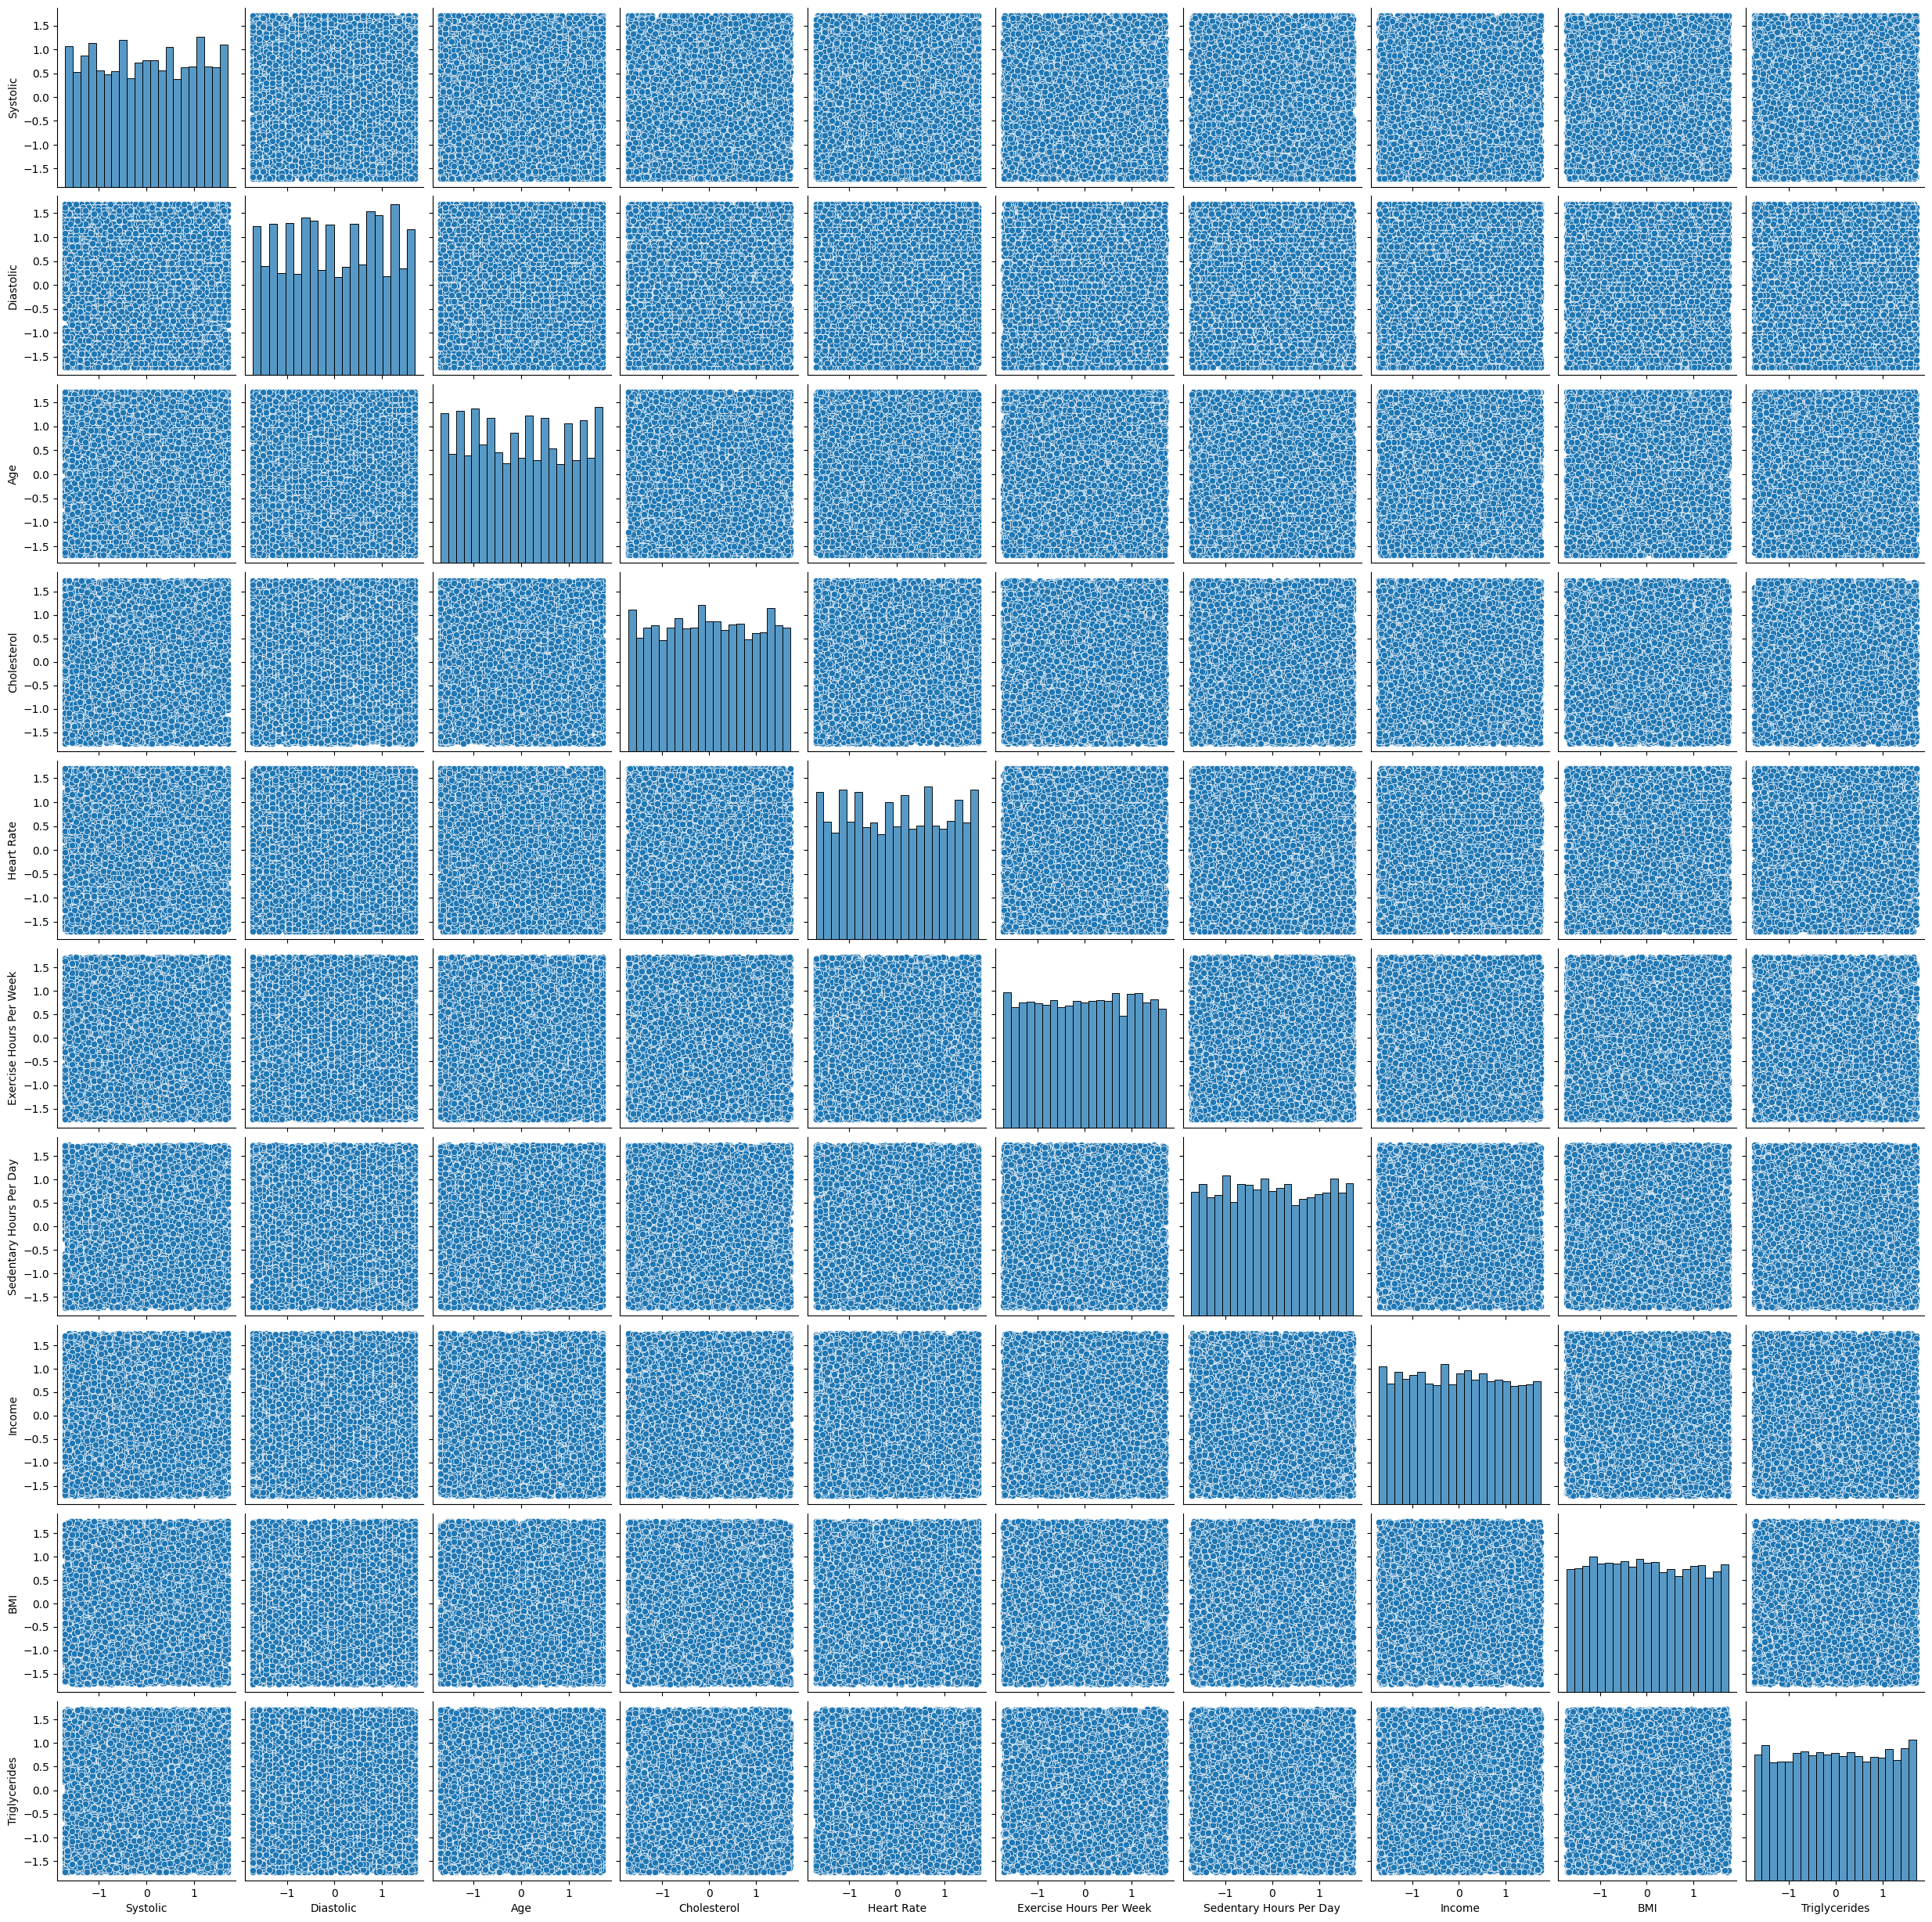

In [30]:
# Task 5: Exploratory Data Analysis (EDA)

# Univariate Analysis
print("\nUnivariate Analysis:")
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis
print("\nBivariate Analysis:")
sns.pairplot(data[num_features])
plt.show()

In [31]:
# Task 6: Outlier Detection and Handling
# Detect outliers using IQR
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers = (data[num_features] < (Q1 - 1.5 * IQR)) | (data[num_features] > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Systolic                   0
Diastolic                  0
Age                        0
Cholesterol                0
Heart Rate                 0
Exercise Hours Per Week    0
Sedentary Hours Per Day    0
Income                     0
BMI                        0
Triglycerides              0
dtype: int64



Data Visualization:


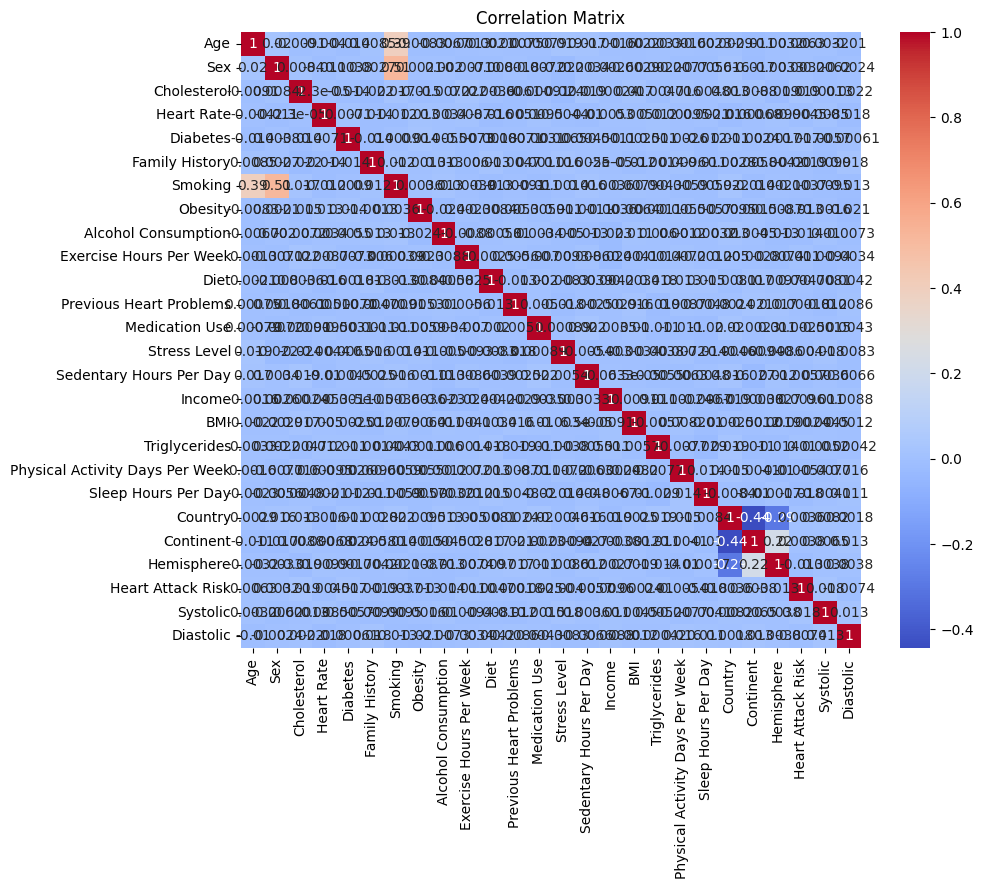

In [32]:
# Task 7: Data Visualization
print("\nData Visualization:")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Task 8: Correlation Analysis
corr_matrix = data.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                                      Age       Sex  Cholesterol  Heart Rate  \
Age                              1.000000  0.020053    -0.009072   -0.003953   
Sex                              0.020053  1.000000     0.008431   -0.010712   
Cholesterol                     -0.009072  0.008431     1.000000    0.000023   
Heart Rate                      -0.003953 -0.010712     0.000023    1.000000   
Diabetes                        -0.013958  0.003807    -0.013617    0.007137   
Family History                   0.008491  0.002707    -0.022209   -0.013854   
Smoking                          0.394660  0.514890     0.016686   -0.012478   
Obesity                         -0.008264  0.002053    -0.014577    0.012505   
Alcohol Consumption             -0.006688  0.002036    -0.007207    0.003400   
Exercise Hours Per Week          0.001350 -0.007122     0.021854    0.008704   
Diet                             0.002061 -0.007956     0.003566   -0.016210   
Previous Heart Prob

In [35]:
# Task 9: Summary and Insights
print("\nSummary and Insights:")
print("1. The data was cleaned by handling missing values and removing duplicates.")
print("2. Numerical features were standardized to improve model performance.")
print("3. Categorical features were converted using one-hot encoding.")
print("4. EDA revealed the distribution of key features and potential correlations.")
print("5. Outliers were detected but not removed in this analysis.")



Summary and Insights:
1. The data was cleaned by handling missing values and removing duplicates.
2. Numerical features were standardized to improve model performance.
3. Categorical features were converted using one-hot encoding.
4. EDA revealed the distribution of key features and potential correlations.
5. Outliers were detected but not removed in this analysis.
